In [1]:
%matplotlib inline

### First create the erddapy object

In [2]:
from erddapy import ERDDAP


server = "https://ferret.pmel.noaa.gov/pmel/erddap"
e = ERDDAP(server=server, protocol="tabledap")

e.dataset_id = "saildrone_arctic_data"

In [3]:
e.variables = [
    "trajectory",
    "latitude",
    "longitude",
    "TEMP_CTD_MEAN",
]

In [4]:
df = e.to_pandas()
df.head()

,trajectory,latitude (degrees_north),longitude (degrees_east),TEMP_CTD_MEAN (degrees_c)
0,1001.0,53.888685,-166.564928,10.380
1,1001.0,53.889318,-166.565082,10.452
2,1001.0,53.889862,-166.565338,10.228
3,1001.0,53.890387,-166.565632,10.326
4,1001.0,53.890931,-166.565939,10.105


In [5]:
set(df["trajectory"])

{1001.0, 1002.0, 1003.0}

Looks like we have 3 trajectories, let's plot them on a map.

In [6]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


def plot_saildrone():
    fig, ax = plt.subplots(
        figsize=(9, 9),
        subplot_kw={"projection": ccrs.PlateCarree()}
    )

    for traj, data in df.groupby("trajectory"):
        ax.scatter(
            data["longitude (degrees_east)"],
            data["latitude (degrees_north)"],
            s=20,
            c=data["TEMP_CTD_MEAN (degrees_c)"],
        )
    ax.coastlines("10m");

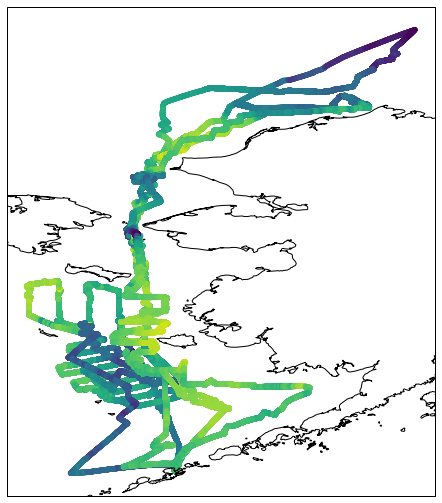

In [7]:
plot_saildrone()